### EKLEMELER KISMINDA EKSİK VERİLERİMİ VERİ SETİNDEN KALDIRSAYDIM MODELİMİN GÜVENİRLİLİĞİNİ NASIL DEĞİŞTİRİRDİ ONU GÖZLEMLEDİM.

Uyguladığım modeller eksik verilerimin veri setinden kaldırılmasıya tüm regresyon metodları r2_Score değerini 0.66 olarak aynı şekilde verdi dolayısıyla , bu işlemlerle modelimin eğitiminden istediğim nitelikte bir güvenirlik almak daha zor olacaktır. Modelimin doğruluğunu engelleyecektir.

In [1]:
#Gerekli import işlemlerini gerçekleştirdim. 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
df= pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
#Eksik değerleri veri setinden kaldırdım.
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [7]:
#Bu değişikliklerden sonra veri setimin boyutu nasıl değişti inceleyelim.Veri setimin boyutu önemli ölçüde azalmıştır.
df.shape

(8887, 21)

### KNEIGBORS REGRESSOR

In [8]:
#MODELLING 
# Veri setimizde bulunan kategorik değişkenleri sayısal etiketlere çevirelim.
categorical_columns=['Type', 'Method', 'Regionname',"Address",'Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']
encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

In [9]:
#Veri setimizi ayıralım.
X = df.drop("Price", axis=1)
y=df["Price"]
# Train ve test seti olarak ayırdım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Standartlaştırma yapalım.
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [11]:
y_pred = knn_model.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred))
mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(r2_score(y_test, y_pred), 2)
print(f" Mean Absolute Error:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared:{r2}")

 Mean Absolute Error:202515
Mean Squared Error: 96987719689.36
Root Mean Squared Error: 311428.51
R-squared:0.75


### LINEAR REGRESSION

In [12]:
X = df.drop(['Price'],axis=1) # Features
y= df['Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print((mean_squared_error(y_test, y_pred, squared=True), 2))
print((mean_squared_error(y_test, y_pred, squared=False), 2))
print(round(r2_score(y_test, y_pred), 2))

368126.0040487619
(135516754856.90907, 2)
(368126.0040487619, 2)
0.66


In [16]:
### LASSO REGRESSION

In [17]:
#Lasso regresyon modelinin değerlerine bakalım.
model= Lasso()
model.fit(X_train , y_train)

y_pred= model.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred))
mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(r2_score(y_test, y_pred), 2)
print(f" Mean Absolute Error:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared:{r2}")

 Mean Absolute Error:257744
Mean Squared Error: 135515952820.03
Root Mean Squared Error: 368124.91
R-squared:0.66


In [18]:
model= Ridge()
model.fit(X_train , y_train)

y_pred= model.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred))
mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(r2_score(y_test, y_pred), 2)
print(f" Mean Absolute Error:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared:{r2}")

 Mean Absolute Error:257621
Mean Squared Error: 135466380195.95
Root Mean Squared Error: 368057.58
R-squared:0.66


In [19]:
# RandomForest Regresyon metodunu kullandım.
rf_model= RandomForestRegressor()
rf_model.fit(X_train , y_train)

y_pred= model.predict(X_test)
mae = round(mean_absolute_error(y_test, y_pred))
mse = round(mean_squared_error(y_test, y_pred, squared=True), 2)
rmse = round(mean_squared_error(y_test, y_pred, squared=False), 2)
r2 = round(r2_score(y_test, y_pred), 2)
print(f" Mean Absolute Error:{mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared:{r2}")

 Mean Absolute Error:257621
Mean Squared Error: 135466380195.95
Root Mean Squared Error: 368057.58
R-squared:0.66


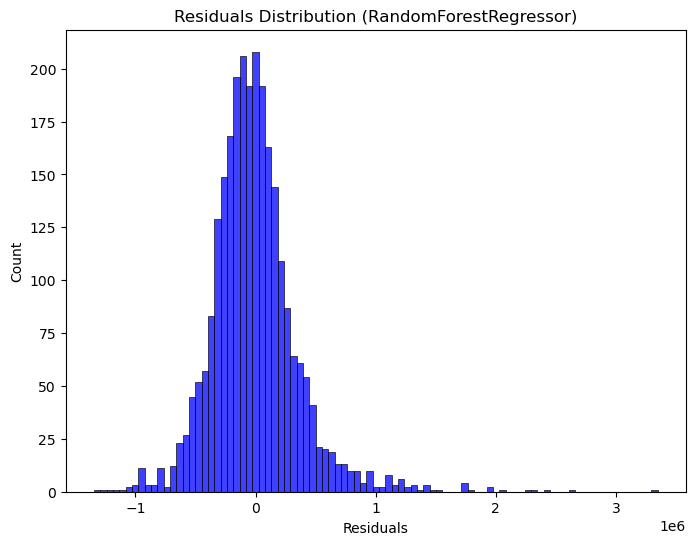

In [20]:
# Tahminleri ve gerçek değerleri içeren bir DataFrame oluşturun
residuals = y_test - y_pred
residuals_df = pd.DataFrame({'Residuals': residuals})

# Hata dağılımını görselleştirin
plt.figure(figsize=(8, 6))
sns.histplot(residuals_df['Residuals'], kde=False, color='blue', edgecolor='black')
plt.title('Residuals Distribution (RandomForestRegressor)')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.show()